<a href="https://colab.research.google.com/github/Hithashreee/housing-K-mean-clustering/blob/main/housing_K_mean_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Plotting based on geographical data set:<br>
Unsupervised learning<br>
K- means cluster<br>
centroid concept<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
df.drop(['ocean_proximity'],axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [16]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [18]:
df=df.loc[:,['longitude','latitude','median_income']]
df.head()

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


In [19]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

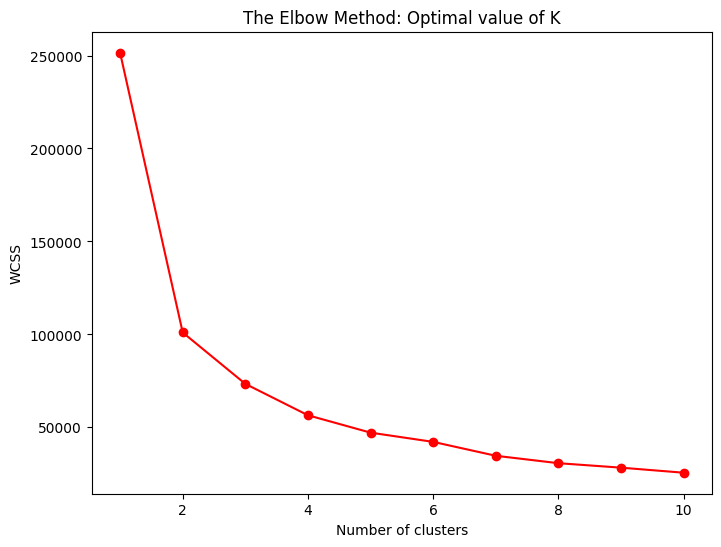

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,color='red',marker='o')
plt.title('The Elbow Method: Optimal value of K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


From Elbow Method, we can conclude that k value is 6

In [27]:
kmeans = KMeans(n_clusters=7,random_state=40)
df['Cluster']=kmeans.fit_predict(df)

In [28]:
df.head()

,longitude,latitude,median_income,Cluster
0,-122.23,37.88,8.3252,5
1,-122.22,37.86,8.3014,5
2,-122.24,37.85,7.2574,5
3,-122.25,37.85,5.6431,3
4,-122.25,37.85,3.8462,3


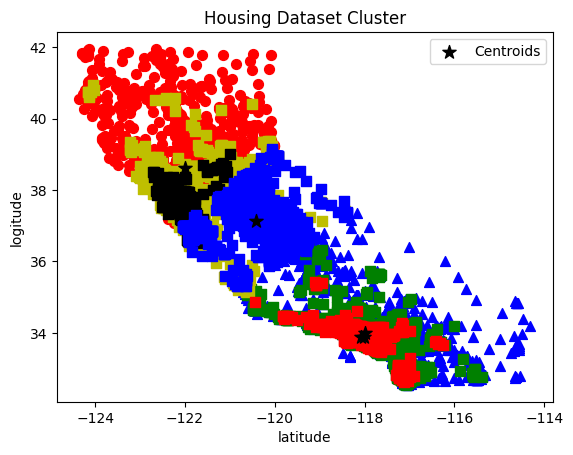

In [31]:
plt.scatter(df[df['Cluster'] == 0].iloc[:,0],df[df['Cluster'] == 0].iloc[:,1],c='b',marker='^',s=50)
plt.scatter(df[df['Cluster'] == 1].iloc[:,0],df[df['Cluster'] == 1].iloc[:,1],c='r',marker='o',s=50)
plt.scatter(df[df['Cluster'] == 2].iloc[:,0],df[df['Cluster'] == 2].iloc[:,1],c='g',marker='s',s=50)
plt.scatter(df[df['Cluster'] == 3].iloc[:,0],df[df['Cluster'] == 3].iloc[:,1],c='y',marker='s',s=50)
plt.scatter(df[df['Cluster'] == 4].iloc[:,0],df[df['Cluster'] == 4].iloc[:,1],c='r',marker='s',s=50)
plt.scatter(df[df['Cluster'] == 5].iloc[:,0],df[df['Cluster'] == 5].iloc[:,1],c='k',marker='s',s=50)
plt.scatter(df[df['Cluster'] == 6].iloc[:,0],df[df['Cluster'] == 6].iloc[:,1],c='b',marker='s',s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='k',marker='*',s=100,label='Centroids')
plt.title('Housing Dataset Cluster')
plt.xlabel('latitude')
plt.ylabel('logitude')
plt.legend()
plt.show()

In [33]:
dir(df)

['Cluster',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__p

In [39]:
df.size

82560